In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import pathlib
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
regions = {"global": "global",
           "united states": "us",
           "brazil": "br",
           "germany": "de",
           "united kingdom": "gb",
           "spain": "es",
           "canada": "ca"
           }

In [6]:
# Define location of the data
data_dir = '../data'
filename = 'selected_regions_top_200_daily.csv'
data_path = os.path.join(data_dir, filename)

if not pathlib.Path(data_path).exists():
    raise FileNotFoundError('No file found at the location defined.')

In [7]:
# Load the dataset
filepath = pathlib.Path(data_path)

if filepath.exists():
    data_df = pd.read_csv(filepath, parse_dates=True)
else:
    data_df = pd.DataFrame()

# View the first 5 rows    
data_df.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,Starboy,The Weeknd,3135625.0,2017-01-01,global,5aAx2yezTd8zXrkmtKl66Z
1,2.0,Closer,The Chainsmokers,3015525.0,2017-01-01,global,7BKLCZ1jbUBVqRi2FVlTVw
2,3.0,Let Me Love You,DJ Snake,2545384.0,2017-01-01,global,4pdPtRcBmOSQDlJ3Fk945m
3,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,2017-01-01,global,5knuzwU65gJK7IF5yJsuaW
4,5.0,One Dance,Drake,2259887.0,2017-01-01,global,1xznGGDReH1oQq0xzbwXa3


In [8]:
data_df["date"] = pd.to_datetime(data_df["date"], format="%Y-%m-%d")
data_df.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,Starboy,The Weeknd,3135625.0,2017-01-01,global,5aAx2yezTd8zXrkmtKl66Z
1,2.0,Closer,The Chainsmokers,3015525.0,2017-01-01,global,7BKLCZ1jbUBVqRi2FVlTVw
2,3.0,Let Me Love You,DJ Snake,2545384.0,2017-01-01,global,4pdPtRcBmOSQDlJ3Fk945m
3,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,2017-01-01,global,5knuzwU65gJK7IF5yJsuaW
4,5.0,One Dance,Drake,2259887.0,2017-01-01,global,1xznGGDReH1oQq0xzbwXa3


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079842 entries, 0 to 2079841
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Position    float64       
 1   Track Name  object        
 2   Artist      object        
 3   Streams     float64       
 4   date        datetime64[ns]
 5   region      object        
 6   spotify_id  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 111.1+ MB


In [10]:
kaggle_data_path = os.path.join(data_dir, "kaggle_spotify_data.csv")

# Load the dataset
filepath = pathlib.Path(kaggle_data_path)

if filepath.exists():
    kaggle_data_df = pd.read_csv(filepath, parse_dates=True)
else:
    kaggle_data_df = pd.DataFrame()

# View the first 5 rows
kaggle_data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [11]:
merged_df = pd.merge(data_df, kaggle_data_df, left_on="spotify_id", right_on="id")
merged_df.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id,acousticness,artists,danceability,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,2.0,Closer,The Chainsmokers,3015525.0,2017-01-01,global,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,...,0.111,-5.599,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2016
1,8.0,Closer,The Chainsmokers,190936.0,2017-01-01,br,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,...,0.111,-5.599,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2016
2,2.0,Closer,The Chainsmokers,128481.0,2017-01-01,ca,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,...,0.111,-5.599,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2016
3,5.0,Closer,The Chainsmokers,170745.0,2017-01-01,de,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,...,0.111,-5.599,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2016
4,18.0,Closer,The Chainsmokers,71346.0,2017-01-01,es,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,...,0.111,-5.599,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2016


In [12]:
merged_df["Year"] = merged_df.date.dt.year
merged_df["Month"] = merged_df.date.dt.month
merged_df2 = merged_df.drop("date", axis=1)
merged_df2.head()

,Position,Track Name,Artist,Streams,region,spotify_id,acousticness,artists,danceability,duration_ms,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,Year,Month
0,2.0,Closer,The Chainsmokers,3015525.0,global,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2016,2017,1
1,8.0,Closer,The Chainsmokers,190936.0,br,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2016,2017,1
2,2.0,Closer,The Chainsmokers,128481.0,ca,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2016,2017,1
3,5.0,Closer,The Chainsmokers,170745.0,de,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2016,2017,1
4,18.0,Closer,The Chainsmokers,71346.0,es,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2016,2017,1


In [13]:
merged_df2["Released Year"] = merged_df["year"]
merged_df3 = merged_df2.drop(["year"], axis=1)
merged_df3.head()

,Position,Track Name,Artist,Streams,region,spotify_id,acousticness,artists,danceability,duration_ms,...,mode,name,popularity,release_date,speechiness,tempo,valence,Year,Month,Released Year
0,2.0,Closer,The Chainsmokers,3015525.0,global,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2017,1,2016
1,8.0,Closer,The Chainsmokers,190936.0,br,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2017,1,2016
2,2.0,Closer,The Chainsmokers,128481.0,ca,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2017,1,2016
3,5.0,Closer,The Chainsmokers,170745.0,de,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2017,1,2016
4,18.0,Closer,The Chainsmokers,71346.0,es,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2017,1,2016


In [14]:
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899795 entries, 0 to 899794
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Position          899795 non-null  float64
 1   Track Name        899795 non-null  object 
 2   Artist            899795 non-null  object 
 3   Streams           899795 non-null  float64
 4   region            899795 non-null  object 
 5   spotify_id        899795 non-null  object 
 6   acousticness      899795 non-null  float64
 7   artists           899795 non-null  object 
 8   danceability      899795 non-null  float64
 9   duration_ms       899795 non-null  int64  
 10  energy            899795 non-null  float64
 11  explicit          899795 non-null  int64  
 12  id                899795 non-null  object 
 13  instrumentalness  899795 non-null  float64
 14  key               899795 non-null  int64  
 15  liveness          899795 non-null  float64
 16  loudness          89

In [15]:
merged_df3.groupby(["region", "Year"]).mean()

Position       Streams  acousticness  danceability  \
region Year                                                         
br     2017  112.060636  7.948546e+04      0.212039      0.686926   
       2018  118.906565  9.275924e+04      0.192095      0.697391   
       2019  120.794972  1.172179e+05      0.260033      0.695553   
       2020  119.208681  1.275880e+05      0.229910      0.710952   
       2021  132.289086  1.292738e+05      0.190336      0.712876   
ca     2017   99.840175  4.345151e+04      0.209000      0.712006   
       2018   97.848032  5.408053e+04      0.217052      0.709474   
       2019  101.736659  5.576638e+04      0.238042      0.702980   
       2020  100.025364  5.862606e+04      0.261996      0.692661   
       2021   98.608866  5.098278e+04      0.276459      0.678615   
de     2017   93.276582  9.062170e+04      0.201852      0.672424   
       2018   99.703664  1.028151e+05      0.201760      0.688735   
       2019  104.578851  1.149033e+05      0.253882      0.684278   
       2020  100.998959  1.283074e+05      0.262138      0.685651   
       2021   98.401208  1.039029e+05      0.256167      0.687322   
es     2017   94.781658  5.603720e+04      0.215315      0.700901   
       2018  102.558074  6.425010e+04      0.209931      0.715292   
       2019   93.440700  9.470901e+04      0.269330      0.731082   
       2020   96.206108  1.021094e+05      0.231469      0.736012   
       2021   91.966667  9.604781e+04      0.258355      0.734102   
gb     2017  101.044482  1.022398e+05      0.229097      0.667799   
       2018   96.527810  1.110617e+05      0.214382      0.668383   
       2019  100.925132  1.077043e+05      0.262591      0.674772   
       2020   98.842135  1.036986e+05      0.281699      0.669618   
       2021   97.745471  8.551011e+04      0.273085      0.658697   
global 2017   98.159498  1.084677e+06      0.212395      0.702164   
       2018   95.917926  1.205615e+06      0.222331      0.707154   
       2019   97.989985  1.248208e+06      0.266619      0.704983   
       2020   97.477850  1.331253e+06      0.276225      0.699947   
       2021   96.897526  1.267410e+06      0.269531      0.697459   
us     2017   99.868210  3.606264e+05      0.205022      0.715239   
       2018   99.443194  4.164509e+05      0.222625      0.712490   
       2019  101.328335  3.992909e+05      0.246629      0.713634   
       2020  100.701160  3.872144e+05      0.253349      0.700394   
       2021   99.777210  3.515978e+05      0.259634      0.678580   

               duration_ms    energy  explicit  instrumentalness       key  \
region Year                                                                  
br     2017  224358.712127  0.656054  0.260695          0.003124  5.012755   
       2018  216157.913859  0.642248  0.389603          0.002934  5.991085   
       2019  201465.577618  0.595803  0.245179          0.015297  5.229436   
       2020  196242.313926  0.613382  0.291965          0.008966  6.166738   
       2021  187219.910029  0.638941  0.362832          0.006521  5.399705   
ca     2017  225863.607844  0.598439  0.600236          0.008365  5.131102   
       2018  209000.820187  0.614821  0.593906          0.003596  5.400931   
       2019  197865.085627  0.596917  0.501529          0.009477  5.378058   
       2020  193866.888332  0.588135  0.502751          0.008603  5.628524   
       2021  193446.330527  0.593131  0.494575          0.008708  5.527123   
de     2017  223341.657925  0.648180  0.344284          0.013447  5.029361   
       2018  208819.057573  0.646344  0.466233          0.005462  5.390765   
       2019  196148.999470  0.604477  0.296399          0.011212  5.507061   
       2020  191580.306068  0.603966  0.424217          0.009168  5.551548   
       2021  188553.631579  0.617872  0.497412          0.003200  5.150129   
es     2017  227782.069104  0.688676  0.181236          0.002368  5.613358   
       2018  216811.285263  0.665945  0.269056          0

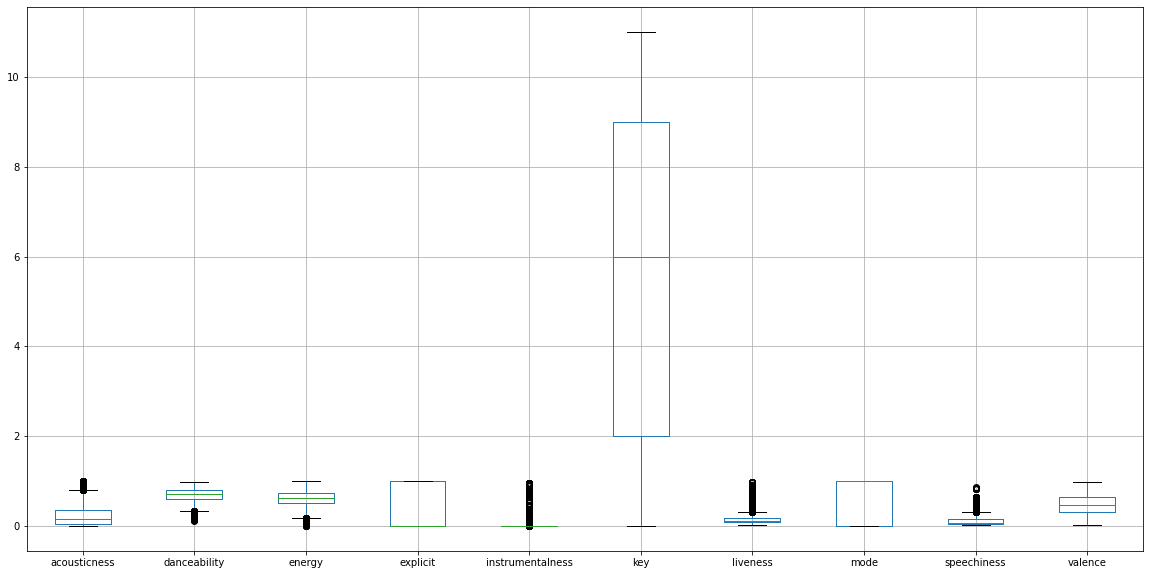

In [16]:
drop_cols = ["Streams", "Position", "duration_ms", "Year", "Released Year", "Month", "tempo", "popularity", "loudness"]
merged_df3.drop(drop_cols, axis=1).boxplot(figsize=(20,10));

In [17]:
merged_df3.head()

,Position,Track Name,Artist,Streams,region,spotify_id,acousticness,artists,danceability,duration_ms,...,mode,name,popularity,release_date,speechiness,tempo,valence,Year,Month,Released Year
0,2.0,Closer,The Chainsmokers,3015525.0,global,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2017,1,2016
1,8.0,Closer,The Chainsmokers,190936.0,br,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2017,1,2016
2,2.0,Closer,The Chainsmokers,128481.0,ca,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2017,1,2016
3,5.0,Closer,The Chainsmokers,170745.0,de,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2017,1,2016
4,18.0,Closer,The Chainsmokers,71346.0,es,7BKLCZ1jbUBVqRi2FVlTVw,0.414,"['The Chainsmokers', 'Halsey']",0.748,244960,...,1,Closer,84,2016-07-29,0.0338,95.01,0.661,2017,1,2016


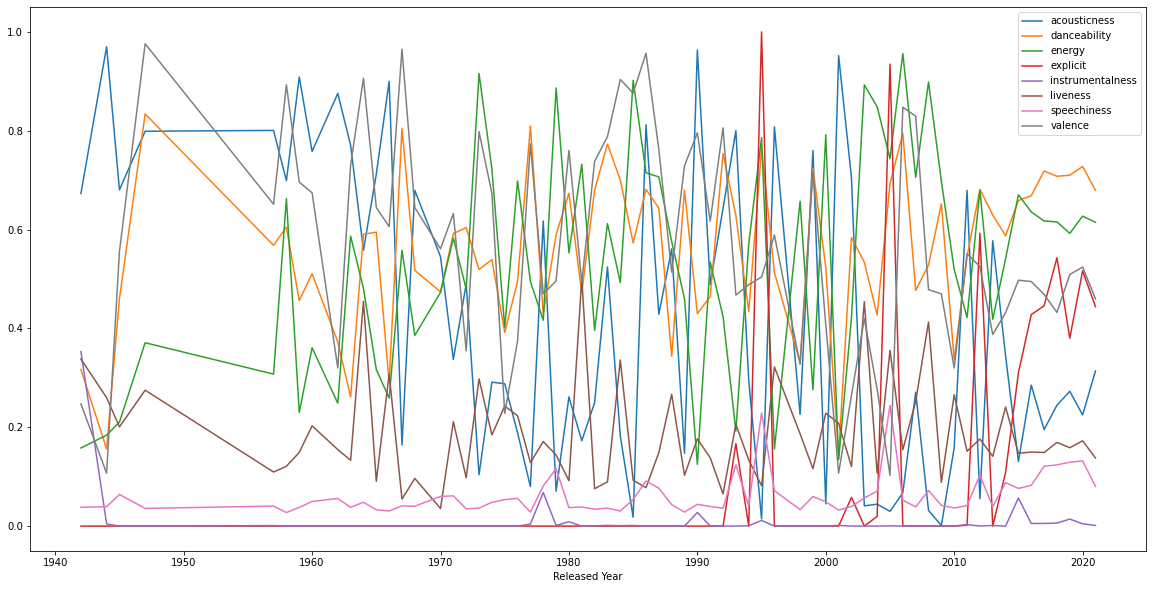

In [18]:
drop_cols = ["Streams", "Position", "duration_ms", "Year", "Month", "tempo", "popularity", "loudness", "key", "mode"]
merged_df3.drop(drop_cols, axis=1).groupby(["region", "Released Year"]).mean().loc["global"].plot(figsize=(20,10));

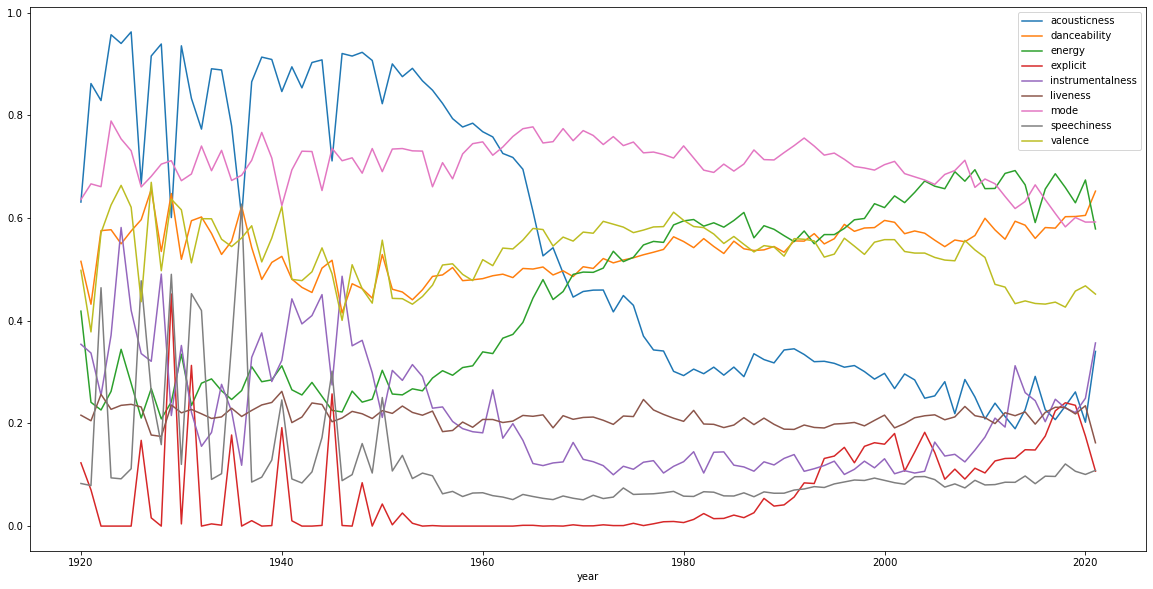

In [19]:
drop_cols = ["duration_ms", "tempo", "popularity", "loudness", "key"]
kaggle_data_df.drop(drop_cols, axis=1).groupby(["year"]).mean().plot(figsize=(20,10));

# Creating Clusters

## Processing Data

In [20]:
kaggle_data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [21]:
# Define x and y variables for CMS prediction
drop_cols = ["artists", "id", "name", "release_date"]
x = kaggle_data_df.drop(drop_cols, axis=1).to_numpy()

# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_transformed = sc.fit_transform(x)

## Determining the number of clusters

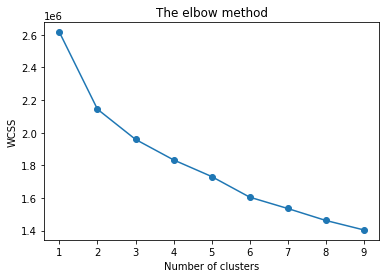

In [26]:
#Determine optimum number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 100)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)
    
#Plot Elbow Method
plt.plot(range(1, 10), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [27]:
#Create Silhouette Coefficients
scores= [0]
for n_cluster in range(2, 10):
       kmeans = KMeans(n_clusters=n_cluster).fit(x)
       label = kmeans.labels_
       sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
       scores.append(sil_coeff) 
       print(f'For n_clusters= {n_cluster}, The Silhouette Coefficient is {sil_coeff: .3f}')

#Plot Silhouette
plt.plot(range(1,10), scores, marker='o')
plt.title('The Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Sihouette Coefficient') 
plt.show()  

KeyboardInterrupt: 